<a href="https://colab.research.google.com/github/dion21001/Materi-Pandas/blob/main/analisa%20kunjungan%20web%20media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import normaltest, mannwhitneyu, chi2_contingency

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Membaca Data

In [59]:
data =pd.read_csv("/content/drive/My Drive/colab/detikcom.csv")
data.head()

<ipython-input-59-2265d300112a>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data =pd.read_csv("/content/drive/My Drive/colab/detikcom.csv")


,Page Title,Page,articleid,contenttype,Source / Medium,Users,Pageviews,Pages / Session,Avg. Session Duration,Avg. Time on Page,New Users
0,Gempa Keras Guncang Jakarta,m.detik.com/news/berita/d-3829115/gempa-keras-...,3829115,singlepagenews,google / organic,99099,127793,1.546663,113.012962,93.089694,18666
1,"Video: dr Michael Triangto, Dokter 'Lapangan' ...",m.detik.com/health/read/2018/01/18/124423/3821...,3821182,singlepagenews,banner / apps,66409,110322,1.651700,14.790801,2.804197,59502
2,Gempa Keras Guncang Jakarta,m.detik.com/news/berita/d-3829115/gempa-keras-...,3829115,singlepagenews,(direct) / (none),64686,79376,1.394323,90.728763,43.394609,25789
3,Gempa Keras Guncang Jakarta,m.detik.com/news/berita/d-3829115/gempa-keras-...,3829115,singlepagenews,googleapis.com / referral,49821,65072,1.386458,137.591554,23.242243,12374
4,Gempa Keras Guncang Jakarta,news.detik.com/berita/d-3829115/gempa-keras-gu...,3829115,singlepagenews,google / organic,39147,46828,1.370963,145.927336,205.678242,9375


In [60]:
data["Source"] = data["Source / Medium"].str.split("/").str[0]
data["Medium"] = data["Source / Medium"].str.split("/").str[1]
data["source Page"] =data["Page"].str.split("/").str[0]
data["Type info"] =data["Page"].str.split("/").str[1]

In [61]:
data.drop(columns =["Page","Source / Medium"],inplace =True)

In [9]:
data.head()

,Page Title,articleid,contenttype,Users,Pageviews,Pages / Session,Avg. Session Duration,Avg. Time on Page,New Users,Source,Medium,source Page,Type info
0,Gempa Keras Guncang Jakarta,3829115,singlepagenews,99099,127793,1.546663,113.012962,93.089694,18666,google,organic,m.detik.com,news
1,"Video: dr Michael Triangto, Dokter 'Lapangan' ...",3821182,singlepagenews,66409,110322,1.651700,14.790801,2.804197,59502,banner,apps,m.detik.com,health
2,Gempa Keras Guncang Jakarta,3829115,singlepagenews,64686,79376,1.394323,90.728763,43.394609,25789,(direct),(none),m.detik.com,news
3,Gempa Keras Guncang Jakarta,3829115,singlepagenews,49821,65072,1.386458,137.591554,23.242243,12374,googleapis.com,referral,m.detik.com,news
4,Gempa Keras Guncang Jakarta,3829115,singlepagenews,39147,46828,1.370963,145.927336,205.678242,9375,google,organic,news.detik.com,berita


In [10]:
data.describe()

,Users,Pageviews,Pages / Session,Avg. Session Duration,Avg. Time on Page,New Users
count,689705.000000,689705.000000,689705.000000,689705.000000,689705.000000,689705.000000
mean,17.020046,19.384419,2.561618,81.201285,70.187414,1.006865
std,286.297745,353.911081,23.994712,485.171659,174.870070,93.482334
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.400000,0.000000
75%,3.000000,4.000000,1.000000,0.000000,59.000000,0.000000
max,99099.000000,127793.000000,3474.000000,61888.000000,2803.000000,59502.000000


In [11]:
data.describe(include =object)

,Page Title,articleid,contenttype,Source,Medium,source Page,Type info
count,689705,689705,689705,689705,689705,689705,689705
unique,152219,173155,29,1782,62,28,374
top,Kerennya Foto Editan Para Master Photoshop,3828507,singlepagenews,google,referral,m.detik.com,news
freq,2223,3057,404059,205102,316985,471443,157126


- ada beberpa data pada source itu yang sama saja tetapi penulisan yang berbeda

In [63]:
def replace_source(value):
    if 'detik' in value:
        return 'detik.com'
    elif 'facebook' in value:
        return 'facebook'
    elif 'google' in value:
      return 'google'
    elif 'twitter' in value:
      return 'twitter'
    elif 'instagram' in value:
      return 'instagram'
    elif 'yahoo' in value:
      return 'yahoo'
    elif 'youtube' in value:
      return 'youtube'
    elif 'msn' in value:
      return 'msn'
    elif 'cnn' in value:
      return 'cnn.com'
    elif 'whatsapp'or 'Whatsapp' in value:
      return 'whatsapp'
    elif 'wikipedia'or 'Wikipedia' in value:
      return 'wikipedia'
    else:
      return 'web_lain'
    return value

data['Source'] = data['Source'].apply(replace_source)

data.head()

,Page Title,articleid,contenttype,Users,Pageviews,Pages / Session,Avg. Session Duration,Avg. Time on Page,New Users,Source,Medium,source Page,Type info
0,Gempa Keras Guncang Jakarta,3829115,singlepagenews,99099,127793,1.546663,113.012962,93.089694,18666,google,organic,m.detik.com,news
1,"Video: dr Michael Triangto, Dokter 'Lapangan' ...",3821182,singlepagenews,66409,110322,1.651700,14.790801,2.804197,59502,whatsapp,apps,m.detik.com,health
2,Gempa Keras Guncang Jakarta,3829115,singlepagenews,64686,79376,1.394323,90.728763,43.394609,25789,whatsapp,(none),m.detik.com,news
3,Gempa Keras Guncang Jakarta,3829115,singlepagenews,49821,65072,1.386458,137.591554,23.242243,12374,google,referral,m.detik.com,news
4,Gempa Keras Guncang Jakarta,3829115,singlepagenews,39147,46828,1.370963,145.927336,205.678242,9375,google,organic,news.detik.com,berita


In [68]:
def Type_info(value):
    if 'news' in value:
      return 'berita'
    elif 'berita' in value:
      return 'berita'
    elif 'travel' in value:
      return 'value'
    elif 'oto' in value:
      return 'otomotif'
    elif 'sport' in value or 'basket' in value or 'raket' in value or 'f1' in value:
      return 'olahraga'
    elif 'resep' in value or 'sup' in value or 'makan' in value:
      return 'makanan'
    elif 'keuangan' in value:
      return 'value'
    elif 'game' in value:
      return 'game'
    elif 'food' in value or 'kuliner' in value or 'makanan' in value or 'mie' in value:
      return 'makanan'
    elif 'health' in value or 'sehat' in value or 'kesehatan' in value or 'klinik' in value:
      return 'kesehatan'
    elif 'bbc' in value or 'internasional' in value or 'abc' in value or 'international' in value or 'australia' in value:
      return "berita_internasional"
    elif 'bursa' in value or 'moneter' in value:
      return 'bursa'
    elif 'bisnis' in value or 'business' in value:
      return 'bisnis'
    elif 'mobil' in value:
      return 'mobil'
    elif 'movie' in value or 'kdrama' in value:
      return 'movie'
    elif 'teknologi' in value or 'gadget' in value:
      return 'teknologi'
    elif 'seleb' in value or 'celeb' in value:
      return 'entertaiment'
    elif 'kpop' in value or 'kpop' in value:
      return 'musik'
    else:
      return "lainnya"

data['Type info'] = data['Type info'].apply(Type_info)

data.head()

,Page Title,articleid,contenttype,Users,Pageviews,Pages / Session,Avg. Session Duration,Avg. Time on Page,New Users,Source,Medium,source Page,Type info
0,Gempa Keras Guncang Jakarta,3829115,singlepagenews,99099,127793,1.546663,113.012962,93.089694,18666,google,organic,m.detik.com,berita
1,"Video: dr Michael Triangto, Dokter 'Lapangan' ...",3821182,singlepagenews,66409,110322,1.651700,14.790801,2.804197,59502,whatsapp,apps,m.detik.com,kesehatan
2,Gempa Keras Guncang Jakarta,3829115,singlepagenews,64686,79376,1.394323,90.728763,43.394609,25789,whatsapp,(none),m.detik.com,berita
3,Gempa Keras Guncang Jakarta,3829115,singlepagenews,49821,65072,1.386458,137.591554,23.242243,12374,google,referral,m.detik.com,berita
4,Gempa Keras Guncang Jakarta,3829115,singlepagenews,39147,46828,1.370963,145.927336,205.678242,9375,google,organic,news.detik.com,berita


In [14]:
def classify_medium(value):
    value = value.lower()
    if value in ['organic', '(none)', '(not set)']:
        return 'organic'
    elif 'app' in value:
        return 'app'
    elif value in ['referral', 'sniply', 'social', 'twitter', 'facebook', 'gplus']:
        return 'referral'
    elif 'cpc' in value or 'sem' in value:  # Mengelompokkan CPC dan SEM bersama-sama
        return 'cpc/sem'
    elif 'native' in value:
        return 'native'
    elif 'email' in value:
        return 'email'
    elif 'mobile' in value or 'msite' in value:
        return 'mobile'
    elif 'desktop' in value:
        return 'desktop'
    elif value in ['oa', 'oaa', 'buoa']:
        return 'oa'
    elif 'btn' in value or 'box' in value or 'nav' in value or 'blast' in value:
        return 'display'
    else:
        return 'lainnya'

# Menerapkan fungsi classify_medium pada kolom 'Medium'
data['Medium'] = data['Medium'].apply(classify_medium)

data.head()

,Page Title,articleid,contenttype,Users,Pageviews,Pages / Session,Avg. Session Duration,Avg. Time on Page,New Users,Source,Medium,source Page,Type info
0,Gempa Keras Guncang Jakarta,3829115,singlepagenews,99099,127793,1.546663,113.012962,93.089694,18666,google,lainnya,m.detik.com,berita
1,"Video: dr Michael Triangto, Dokter 'Lapangan' ...",3821182,singlepagenews,66409,110322,1.651700,14.790801,2.804197,59502,whatsapp,app,m.detik.com,kesehatan
2,Gempa Keras Guncang Jakarta,3829115,singlepagenews,64686,79376,1.394323,90.728763,43.394609,25789,whatsapp,lainnya,m.detik.com,berita
3,Gempa Keras Guncang Jakarta,3829115,singlepagenews,49821,65072,1.386458,137.591554,23.242243,12374,google,lainnya,m.detik.com,berita
4,Gempa Keras Guncang Jakarta,3829115,singlepagenews,39147,46828,1.370963,145.927336,205.678242,9375,google,lainnya,news.detik.com,berita


In [15]:
def classify_contenttype(value):
    value = value.lower()
    if 'page' in value or 'news' in value or 'longstorynews' in value or 'resepnews' in value:
        return 'pagenews'
    elif 'video' in value:
      return 'video'
    elif 'team' in value:
      return 'sr:team'
    elif "live" in value:
      return 'live'
    elif '(not set)' in value :
      return 'lainnya'
    else:
        return value

# Menerapkan fungsi classify_medium pada kolom 'Medium'
data['contenttype'] = data['contenttype'].apply(classify_contenttype)


In [16]:
pd.DataFrame(data["contenttype"].unique())

,0
0,pagenews
1,multiplefotophoto
2,video
3,lainnya
4,sr:team
5,live


In [17]:
data.describe(include ='object')

,Page Title,articleid,contenttype,Source,Medium,source Page,Type info
count,689705,689705,689705,689705,689705,689705,689705
unique,152219,173155,6,10,8,28,16
top,Kerennya Foto Editan Para Master Photoshop,3828507,pagenews,google,lainnya,m.detik.com,lainnya
freq,2223,3057,452902,247360,636446,471443,262533


## EDA

In [18]:
data.groupby("Type info")["Users"].sum().reset_index()

,Type info,Users
0,berita,4912139
1,berita_internasional,63081
2,bisnis,2925
3,bursa,23329
4,entertaiment,562541
5,game,17850
6,kesehatan,310784
7,lainnya,4157934
8,makanan,109138
9,mobil,24939


## Analisa column Type info

<ipython-input-19-8d53a7f68d3d>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(data.groupby("Type info")["New Users"].sum().reset_index()["Type info"], rotation=90)
<ipython-input-19-8d53a7f68d3d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data.groupby("Type info")["Users"].sum().reset_index()["Users"], x=data.groupby("Type info")["Users"].sum().reset_index()["Type info"], ax=axes[0,1],palette ="BrBG",color="yellow")
<ipython-input-19-8d53a7f68d3d>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(data.groupby("Type info")["Users"].sum().reset_index()["Type info"], rotation=90)
<ipython-input-19-8d53a7f68d3d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0.

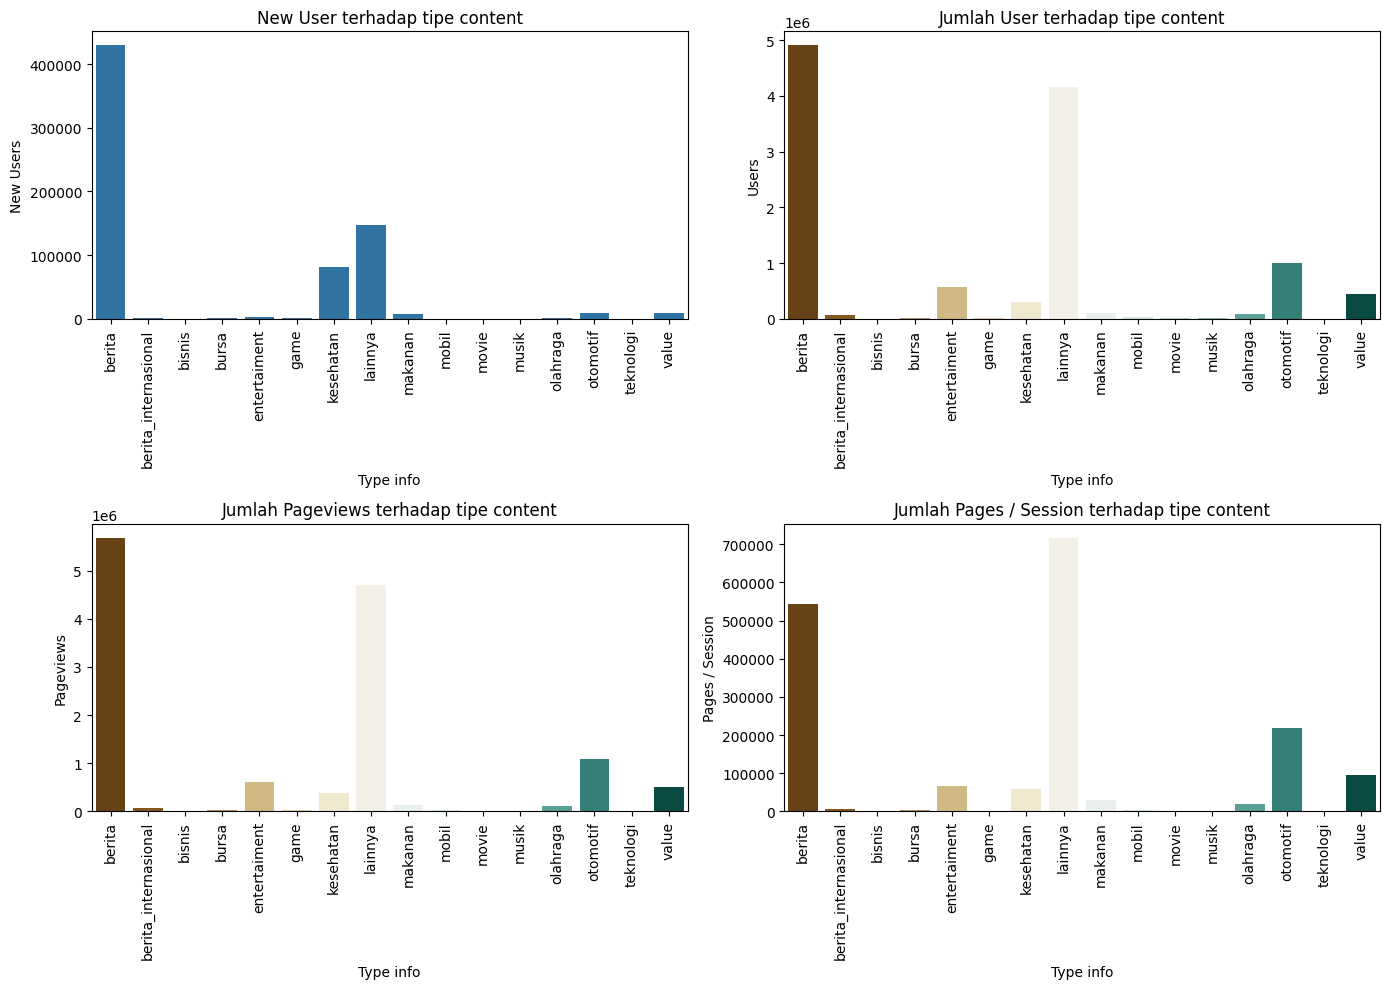

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))

# New User terhadap tipe content
axes[0,0].set_title("New User terhadap tipe content")
sns.barplot(y=data.groupby("Type info")["New Users"].sum().reset_index()["New Users"], x=data.groupby("Type info")["New Users"].sum().reset_index()["Type info"], ax=axes[0,0])
axes[0,0].set_xticklabels(data.groupby("Type info")["New Users"].sum().reset_index()["Type info"], rotation=90)
# Jumlah User terhadap tipe content
axes[0,1].set_title("Jumlah User terhadap tipe content")
sns.barplot(y=data.groupby("Type info")["Users"].sum().reset_index()["Users"], x=data.groupby("Type info")["Users"].sum().reset_index()["Type info"], ax=axes[0,1],palette ="BrBG",color="yellow")
axes[0,1].set_xticklabels(data.groupby("Type info")["Users"].sum().reset_index()["Type info"], rotation=90)

# Jumlah Pageviews terhadap tipe content
axes[1,0].set_title("Jumlah Pageviews terhadap tipe content")
sns.barplot(y=data.groupby("Type info")["Pageviews"].sum().reset_index()["Pageviews"], x=data.groupby("Type info")["Pageviews"].sum().reset_index()["Type info"], ax=axes[1,0],palette ="BrBG",color="yellow")
axes[1,0].set_xticklabels(data.groupby("Type info")["Pageviews"].sum().reset_index()["Type info"], rotation=90)

# Jumlah Pages / Session terhadap tipe content
axes[1,1].set_title("Jumlah Pages / Session terhadap tipe content")
sns.barplot(y=data.groupby("Type info")["Pages / Session"].sum().reset_index()["Pages / Session"], x=data.groupby("Type info")["Pages / Session"].sum().reset_index()["Type info"], ax=axes[1,1],palette ="BrBG",color="yellow")
axes[1,1].set_xticklabels(data.groupby("Type info")["Pages / Session"].sum().reset_index()["Type info"], rotation=90)
# Menampilkan plot
plt.tight_layout()
plt.show()

In [20]:
data.head(1)

,Page Title,articleid,contenttype,Users,Pageviews,Pages / Session,Avg. Session Duration,Avg. Time on Page,New Users,Source,Medium,source Page,Type info
0,Gempa Keras Guncang Jakarta,3829115,pagenews,99099,127793,1.546663,113.012962,93.089694,18666,google,lainnya,m.detik.com,berita


<ipython-input-21-a6cc8ec1fbb0>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(data.groupby("Type info")["Avg. Session Duration"].sum().reset_index()["Type info"], rotation=90)
<ipython-input-21-a6cc8ec1fbb0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data.groupby("Type info")["Avg. Time on Page"].sum().reset_index()["Avg. Time on Page"], x=data.groupby("Type info")["Avg. Time on Page"].sum().reset_index()["Type info"], ax=axes[1],palette ="BrBG",color="yellow")
<ipython-input-21-a6cc8ec1fbb0>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(data.groupby("Type info")["Avg. Time on Page"].sum().reset_index()["Type info"], rotation=90)


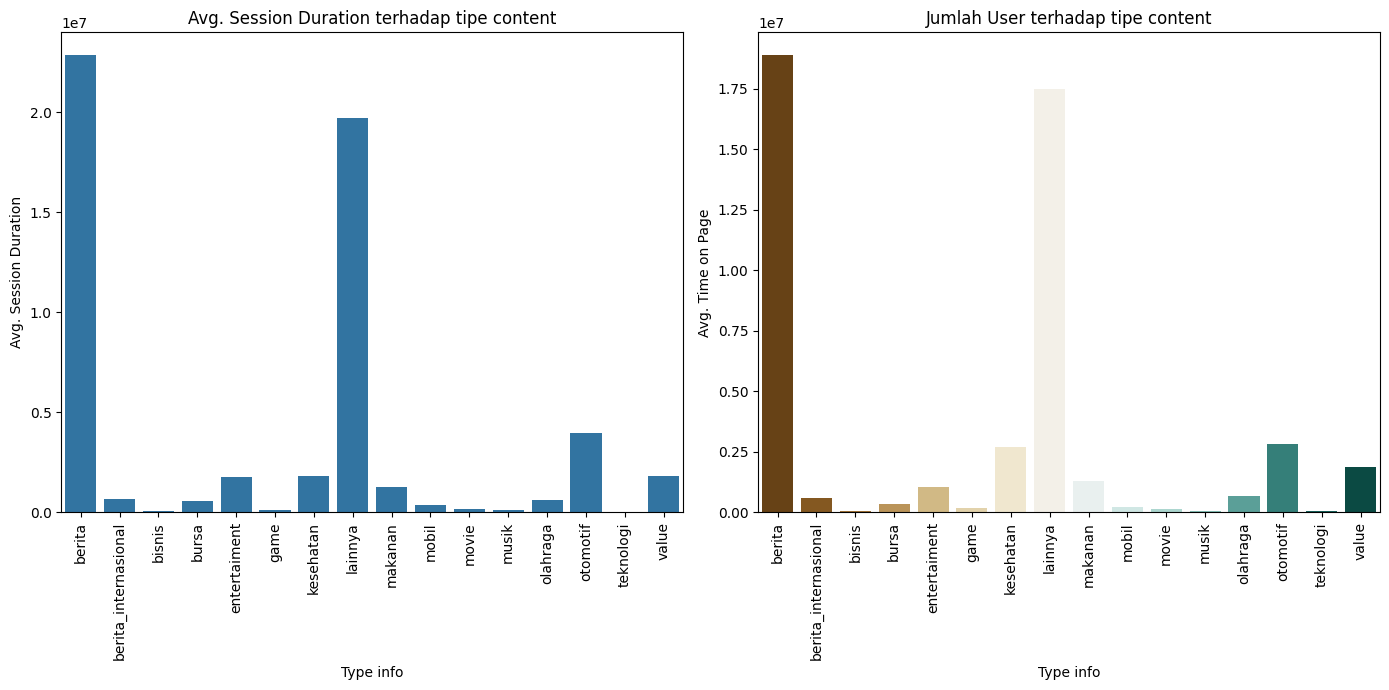

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

# New User terhadap tipe content
axes[0].set_title("Avg. Session Duration terhadap tipe content")
sns.barplot(y=data.groupby("Type info")["Avg. Session Duration"].sum().reset_index()["Avg. Session Duration"], x=data.groupby("Type info")["Avg. Session Duration"].sum().reset_index()["Type info"], ax=axes[0])
axes[0].set_xticklabels(data.groupby("Type info")["Avg. Session Duration"].sum().reset_index()["Type info"], rotation=90)
# Jumlah User terhadap tipe content
axes[1].set_title("Jumlah User terhadap tipe content")
sns.barplot(y=data.groupby("Type info")["Avg. Time on Page"].sum().reset_index()["Avg. Time on Page"], x=data.groupby("Type info")["Avg. Time on Page"].sum().reset_index()["Type info"], ax=axes[1],palette ="BrBG",color="yellow")
axes[1].set_xticklabels(data.groupby("Type info")["Avg. Time on Page"].sum().reset_index()["Type info"], rotation=90)
plt.tight_layout()
plt.show()

## analisa column source page

<ipython-input-22-f58bb5ee9595>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(data.groupby("source Page")["New Users"].sum().reset_index()["source Page"], rotation=90)
<ipython-input-22-f58bb5ee9595>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data.groupby("source Page")["Users"].sum().reset_index()["Users"], x=data.groupby("source Page")["Users"].sum().reset_index()["source Page"], ax=axes[0,1],palette ="BrBG",color="yellow")
<ipython-input-22-f58bb5ee9595>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(data.groupby("source Page")["Users"].sum().reset_index()["source Page"], rotation=90)
<ipython-input-22-f58bb5ee9595>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remov

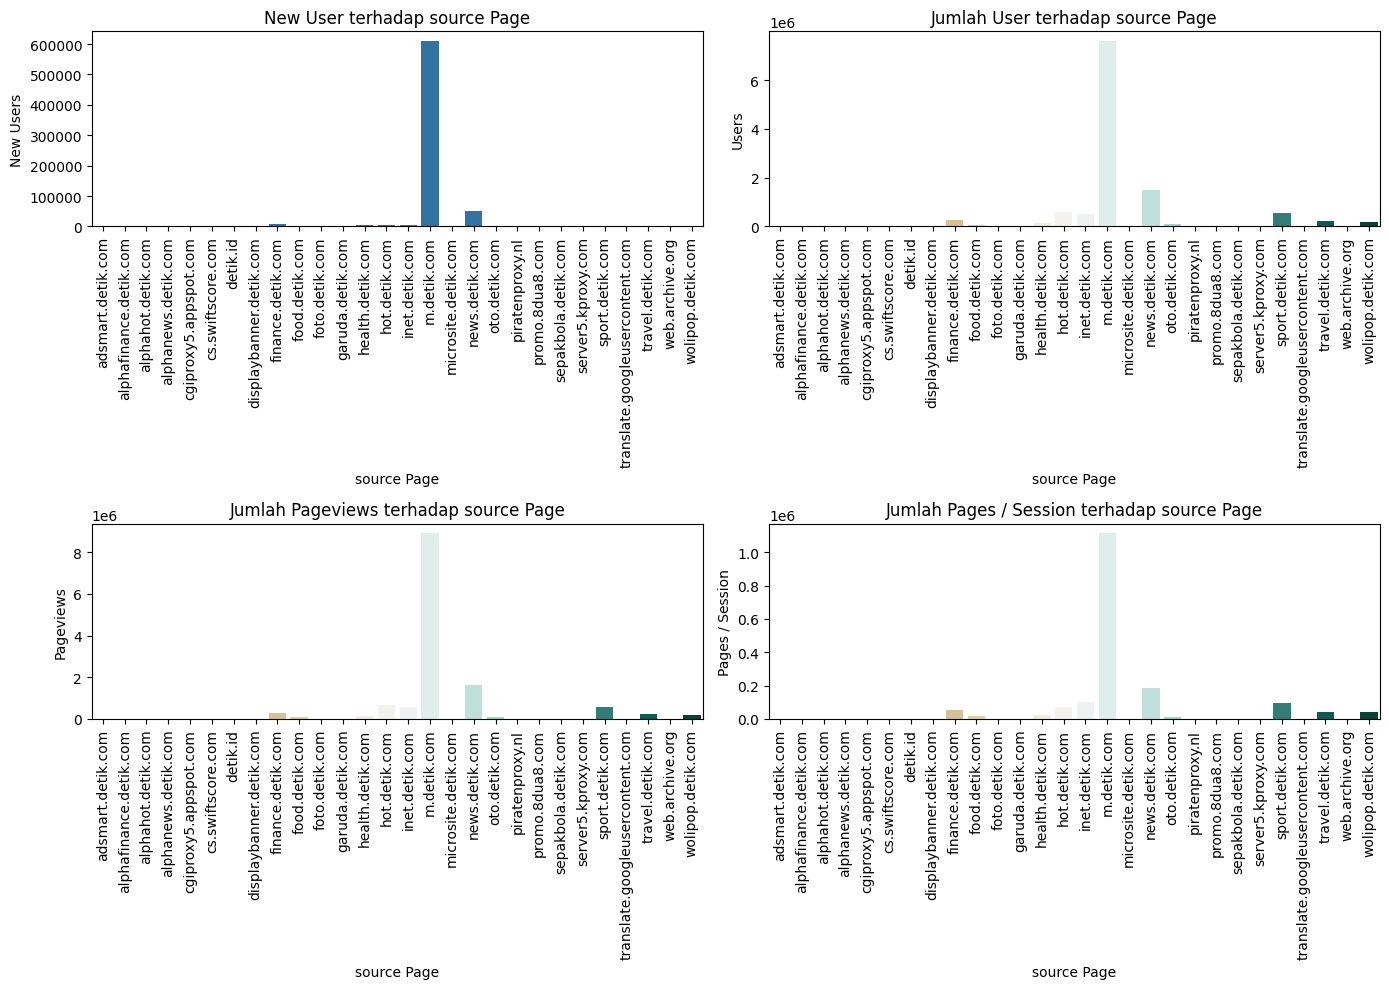

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))

# New User terhadap tipe content
axes[0,0].set_title("New User terhadap source Page")
sns.barplot(y=data.groupby("source Page")["New Users"].sum().reset_index()["New Users"], x=data.groupby("source Page")["New Users"].sum().reset_index()["source Page"], ax=axes[0,0])
axes[0,0].set_xticklabels(data.groupby("source Page")["New Users"].sum().reset_index()["source Page"], rotation=90)
# Jumlah User terhadap tipe content
axes[0,1].set_title("Jumlah User terhadap source Page")
sns.barplot(y=data.groupby("source Page")["Users"].sum().reset_index()["Users"], x=data.groupby("source Page")["Users"].sum().reset_index()["source Page"], ax=axes[0,1],palette ="BrBG",color="yellow")
axes[0,1].set_xticklabels(data.groupby("source Page")["Users"].sum().reset_index()["source Page"], rotation=90)

# Jumlah Pageviews terhadap tipe content
axes[1,0].set_title("Jumlah Pageviews terhadap source Page")
sns.barplot(y=data.groupby("source Page")["Pageviews"].sum().reset_index()["Pageviews"], x=data.groupby("source Page")["Pageviews"].sum().reset_index()["source Page"], ax=axes[1,0],palette ="BrBG",color="yellow")
axes[1,0].set_xticklabels(data.groupby("source Page")["Pageviews"].sum().reset_index()["source Page"], rotation=90)

# Jumlah Pages / Session terhadap tipe content
axes[1,1].set_title("Jumlah Pages / Session terhadap source Page")
sns.barplot(y=data.groupby("source Page")["Pages / Session"].sum().reset_index()["Pages / Session"], x=data.groupby("source Page")["Pages / Session"].sum().reset_index()["source Page"], ax=axes[1,1],palette ="BrBG",color="yellow")
axes[1,1].set_xticklabels(data.groupby("source Page")["Pages / Session"].sum().reset_index()["source Page"], rotation=90)
# Menampilkan plot
plt.tight_layout()
plt.show()

<ipython-input-23-bde1f6790027>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(data.groupby("source Page")["Avg. Session Duration"].sum().reset_index()["source Page"], rotation=90)
<ipython-input-23-bde1f6790027>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data.groupby("source Page")["Avg. Time on Page"].sum().reset_index()["Avg. Time on Page"], x=data.groupby("source Page")["Avg. Time on Page"].sum().reset_index()["source Page"], ax=axes[1],palette ="BrBG",color="yellow")
<ipython-input-23-bde1f6790027>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(data.groupby("source Page")["Avg. Time on Page"].sum().reset_index()["source Page"], rotation=90)


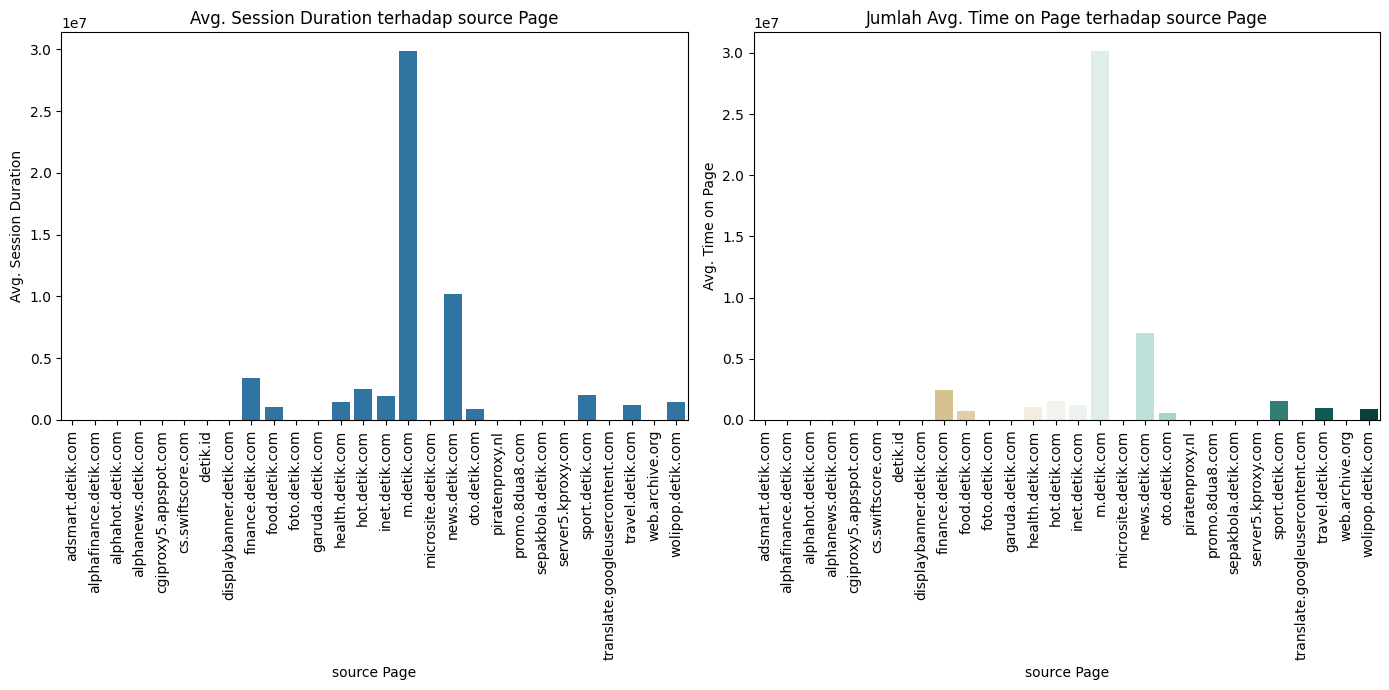

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

# New User terhadap tipe content
axes[0].set_title("Avg. Session Duration terhadap source Page")
sns.barplot(y=data.groupby("source Page")["Avg. Session Duration"].sum().reset_index()["Avg. Session Duration"], x=data.groupby("source Page")["Avg. Session Duration"].sum().reset_index()["source Page"], ax=axes[0])
axes[0].set_xticklabels(data.groupby("source Page")["Avg. Session Duration"].sum().reset_index()["source Page"], rotation=90)
# Jumlah User terhadap tipe content
axes[1].set_title("Jumlah Avg. Time on Page terhadap source Page")
sns.barplot(y=data.groupby("source Page")["Avg. Time on Page"].sum().reset_index()["Avg. Time on Page"], x=data.groupby("source Page")["Avg. Time on Page"].sum().reset_index()["source Page"], ax=axes[1],palette ="BrBG",color="yellow")
axes[1].set_xticklabels(data.groupby("source Page")["Avg. Time on Page"].sum().reset_index()["source Page"], rotation=90)
plt.tight_layout()
plt.show()

## Analisa column medium

<ipython-input-24-d7e144887948>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(data.groupby("Medium")["New Users"].sum().reset_index()["Medium"], rotation=90)
<ipython-input-24-d7e144887948>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data.groupby("Medium")["Users"].sum().reset_index()["Users"], x=data.groupby("Medium")["Users"].sum().reset_index()["Medium"], ax=axes[0,1],palette ="BrBG",color="yellow")
<ipython-input-24-d7e144887948>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(data.groupby("Medium")["Users"].sum().reset_index()["Medium"], rotation=90)
<ipython-input-24-d7e144887948>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` varia

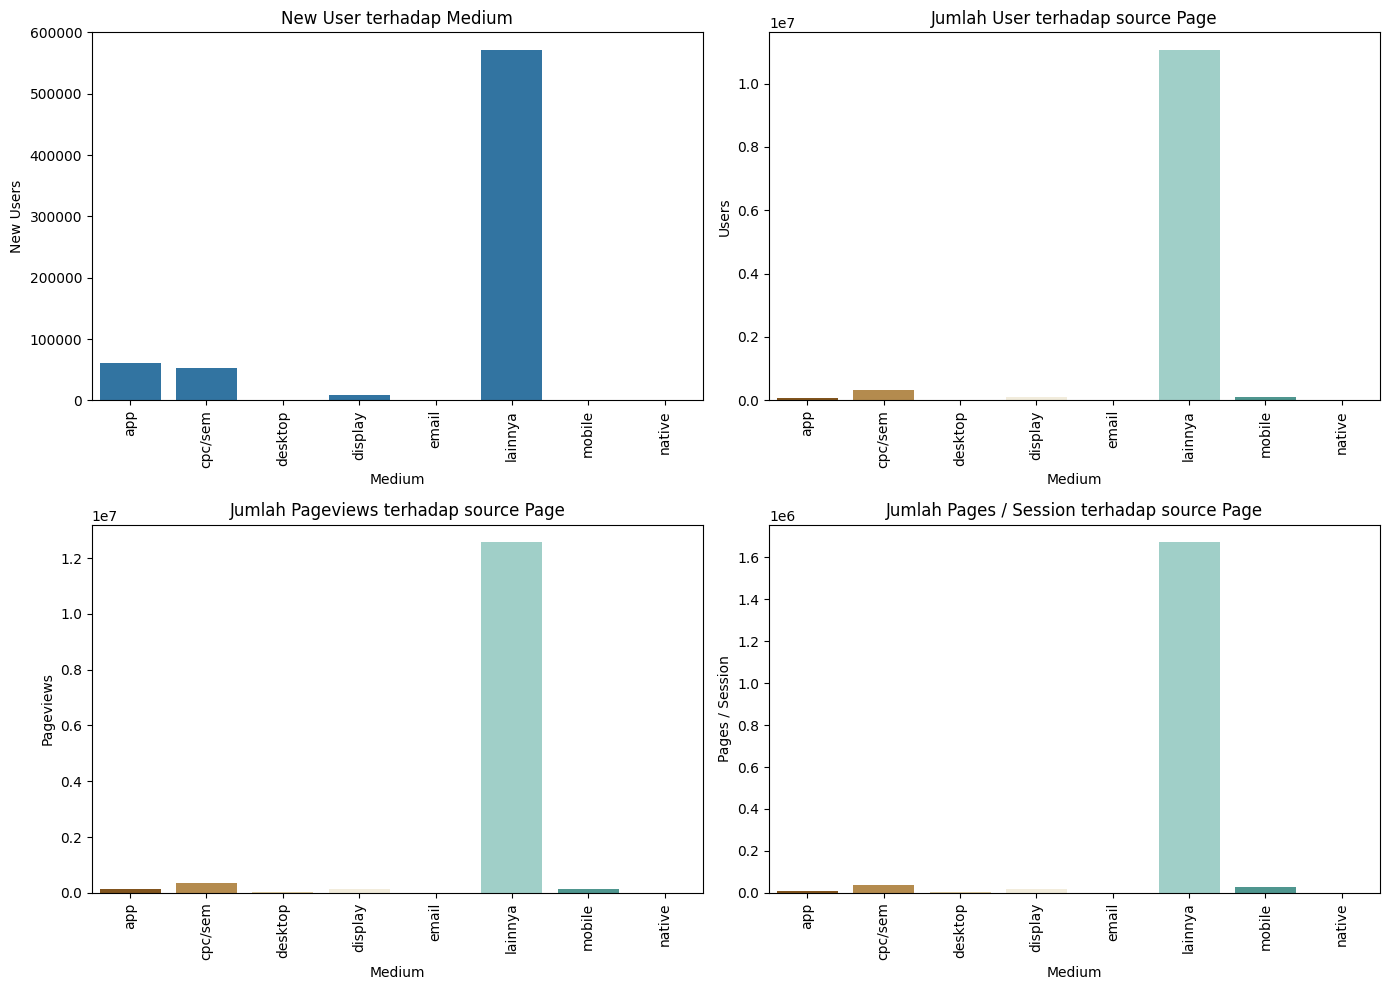

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))

# New User terhadap tipe content
axes[0,0].set_title("New User terhadap Medium")
sns.barplot(y=data.groupby("Medium")["New Users"].sum().reset_index()["New Users"], x=data.groupby("Medium")["New Users"].sum().reset_index()["Medium"], ax=axes[0,0])
axes[0,0].set_xticklabels(data.groupby("Medium")["New Users"].sum().reset_index()["Medium"], rotation=90)
# Jumlah User terhadap tipe content
axes[0,1].set_title("Jumlah User terhadap source Page")
sns.barplot(y=data.groupby("Medium")["Users"].sum().reset_index()["Users"], x=data.groupby("Medium")["Users"].sum().reset_index()["Medium"], ax=axes[0,1],palette ="BrBG",color="yellow")
axes[0,1].set_xticklabels(data.groupby("Medium")["Users"].sum().reset_index()["Medium"], rotation=90)

# Jumlah Pageviews terhadap tipe content
axes[1,0].set_title("Jumlah Pageviews terhadap source Page")
sns.barplot(y=data.groupby("Medium")["Pageviews"].sum().reset_index()["Pageviews"], x=data.groupby("Medium")["Pageviews"].sum().reset_index()["Medium"], ax=axes[1,0],palette ="BrBG",color="yellow")
axes[1,0].set_xticklabels(data.groupby("Medium")["Pageviews"].sum().reset_index()["Medium"], rotation=90)

# Jumlah Pages / Session terhadap tipe content
axes[1,1].set_title("Jumlah Pages / Session terhadap source Page")
sns.barplot(y=data.groupby("Medium")["Pages / Session"].sum().reset_index()["Pages / Session"], x=data.groupby("Medium")["Pages / Session"].sum().reset_index()["Medium"], ax=axes[1,1],palette ="BrBG",color="yellow")
axes[1,1].set_xticklabels(data.groupby("Medium")["Pages / Session"].sum().reset_index()["Medium"], rotation=90)
# Menampilkan plot
plt.tight_layout()
plt.show()

<ipython-input-25-bdddb5cdec2f>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(data.groupby("Medium")["Avg. Session Duration"].sum().reset_index()["Medium"], rotation=90)
<ipython-input-25-bdddb5cdec2f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data.groupby("Medium")["Avg. Time on Page"].sum().reset_index()["Avg. Time on Page"], x=data.groupby("Medium")["Avg. Time on Page"].sum().reset_index()["Medium"], ax=axes[1],palette ="BrBG",color="yellow")
<ipython-input-25-bdddb5cdec2f>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(data.groupby("Medium")["Avg. Time on Page"].sum().reset_index()["Medium"], rotation=90)


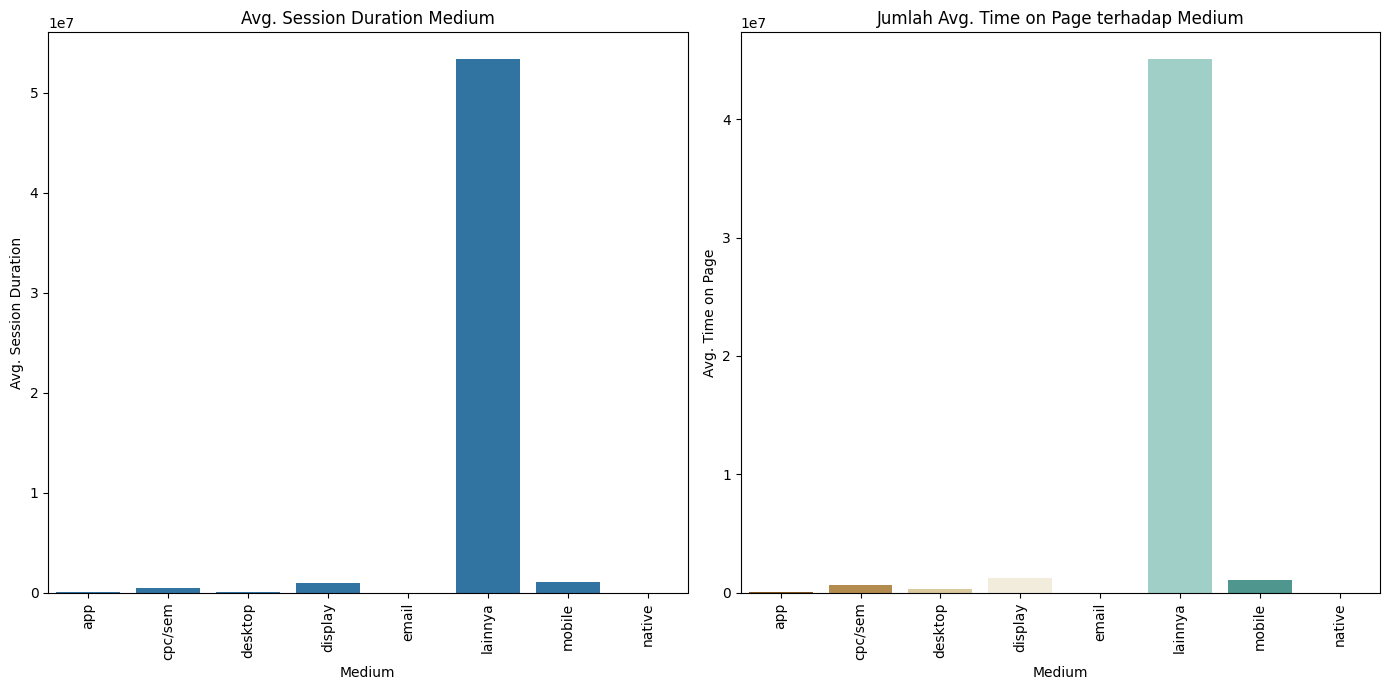

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

# New User terhadap tipe content
axes[0].set_title("Avg. Session Duration Medium")
sns.barplot(y=data.groupby("Medium")["Avg. Session Duration"].sum().reset_index()["Avg. Session Duration"], x=data.groupby("Medium")["Avg. Session Duration"].sum().reset_index()["Medium"], ax=axes[0])
axes[0].set_xticklabels(data.groupby("Medium")["Avg. Session Duration"].sum().reset_index()["Medium"], rotation=90)
# Jumlah User terhadap tipe content
axes[1].set_title("Jumlah Avg. Time on Page terhadap Medium")
sns.barplot(y=data.groupby("Medium")["Avg. Time on Page"].sum().reset_index()["Avg. Time on Page"], x=data.groupby("Medium")["Avg. Time on Page"].sum().reset_index()["Medium"], ax=axes[1],palette ="BrBG",color="yellow")
axes[1].set_xticklabels(data.groupby("Medium")["Avg. Time on Page"].sum().reset_index()["Medium"], rotation=90)
plt.tight_layout()
plt.show()

## Analisa column :source

In [26]:
data.head(1)

,Page Title,articleid,contenttype,Users,Pageviews,Pages / Session,Avg. Session Duration,Avg. Time on Page,New Users,Source,Medium,source Page,Type info
0,Gempa Keras Guncang Jakarta,3829115,pagenews,99099,127793,1.546663,113.012962,93.089694,18666,google,lainnya,m.detik.com,berita


<ipython-input-27-0427e774c605>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(data.groupby("Source")["New Users"].sum().reset_index()["Source"], rotation=90)
<ipython-input-27-0427e774c605>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data.groupby("Source")["Users"].sum().reset_index()["Users"], x=data.groupby("Source")["Users"].sum().reset_index()["Source"], ax=axes[0,1],palette ="BrBG",color="yellow")
<ipython-input-27-0427e774c605>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(data.groupby("Source")["Users"].sum().reset_index()["Source"], rotation=90)
<ipython-input-27-0427e774c605>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` varia

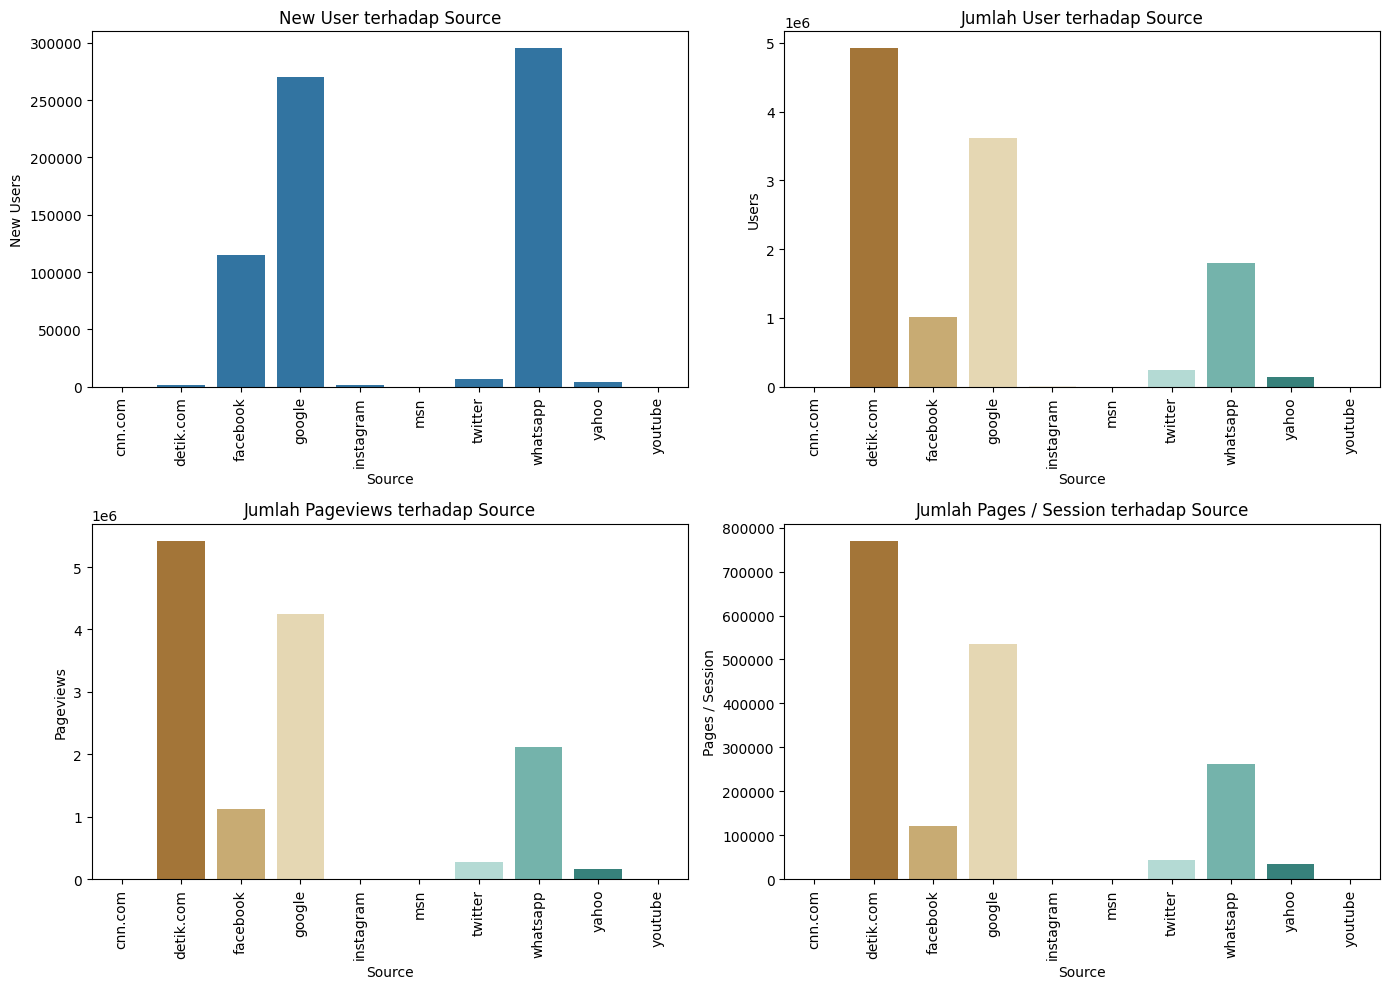

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))

# New User terhadap tipe content
axes[0,0].set_title("New User terhadap Source")
sns.barplot(y=data.groupby("Source")["New Users"].sum().reset_index()["New Users"], x=data.groupby("Source")["New Users"].sum().reset_index()["Source"], ax=axes[0,0])
axes[0,0].set_xticklabels(data.groupby("Source")["New Users"].sum().reset_index()["Source"], rotation=90)
# Jumlah User terhadap tipe content
axes[0,1].set_title("Jumlah User terhadap Source")
sns.barplot(y=data.groupby("Source")["Users"].sum().reset_index()["Users"], x=data.groupby("Source")["Users"].sum().reset_index()["Source"], ax=axes[0,1],palette ="BrBG",color="yellow")
axes[0,1].set_xticklabels(data.groupby("Source")["Users"].sum().reset_index()["Source"], rotation=90)

# Jumlah Pageviews terhadap tipe content
axes[1,0].set_title("Jumlah Pageviews terhadap Source")
sns.barplot(y=data.groupby("Source")["Pageviews"].sum().reset_index()["Pageviews"], x=data.groupby("Source")["Pageviews"].sum().reset_index()["Source"], ax=axes[1,0],palette ="BrBG",color="yellow")
axes[1,0].set_xticklabels(data.groupby("Source")["Pageviews"].sum().reset_index()["Source"], rotation=90)

# Jumlah Pages / Session terhadap tipe content
axes[1,1].set_title("Jumlah Pages / Session terhadap Source")
sns.barplot(y=data.groupby("Source")["Pages / Session"].sum().reset_index()["Pages / Session"], x=data.groupby("Source")["Pages / Session"].sum().reset_index()["Source"], ax=axes[1,1],palette ="BrBG",color="yellow")
axes[1,1].set_xticklabels(data.groupby("Source")["Pages / Session"].sum().reset_index()["Source"], rotation=90)
# Menampilkan plot
plt.tight_layout()
plt.show()

<ipython-input-28-1c01b13a65eb>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(data.groupby("Source")["Avg. Session Duration"].sum().reset_index()["Source"], rotation=90)
<ipython-input-28-1c01b13a65eb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data.groupby("Source")["Avg. Time on Page"].sum().reset_index()["Avg. Time on Page"], x=data.groupby("Source")["Avg. Time on Page"].sum().reset_index()["Source"], ax=axes[1],palette ="BrBG",color="yellow")
<ipython-input-28-1c01b13a65eb>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(data.groupby("Source")["Avg. Time on Page"].sum().reset_index()["Source"], rotation=90)


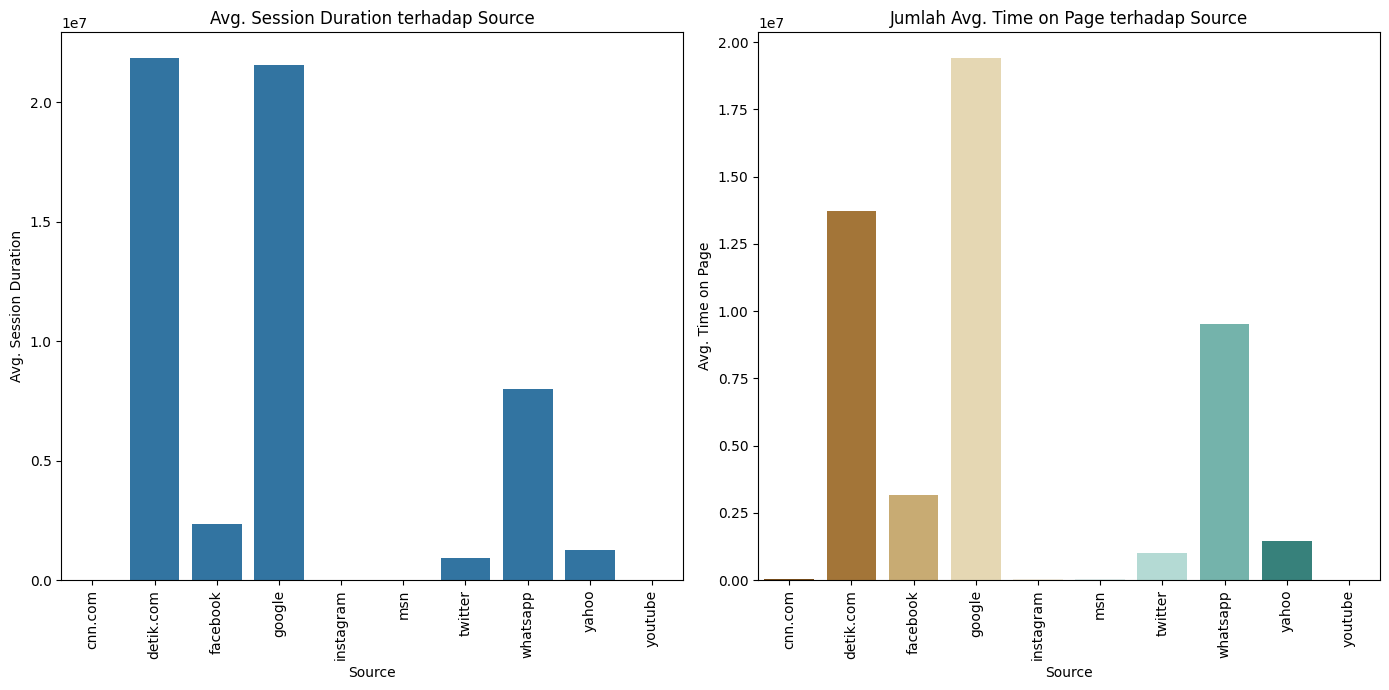

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

# New User terhadap tipe content
axes[0].set_title("Avg. Session Duration terhadap Source")
sns.barplot(y=data.groupby("Source")["Avg. Session Duration"].sum().reset_index()["Avg. Session Duration"], x=data.groupby("Source")["Avg. Session Duration"].sum().reset_index()["Source"], ax=axes[0])
axes[0].set_xticklabels(data.groupby("Source")["Avg. Session Duration"].sum().reset_index()["Source"], rotation=90)
# Jumlah User terhadap tipe content
axes[1].set_title("Jumlah Avg. Time on Page terhadap Source")
sns.barplot(y=data.groupby("Source")["Avg. Time on Page"].sum().reset_index()["Avg. Time on Page"], x=data.groupby("Source")["Avg. Time on Page"].sum().reset_index()["Source"], ax=axes[1],palette ="BrBG",color="yellow")
axes[1].set_xticklabels(data.groupby("Source")["Avg. Time on Page"].sum().reset_index()["Source"], rotation=90)
plt.tight_layout()
plt.show()

In [29]:
data.head(1)

,Page Title,articleid,contenttype,Users,Pageviews,Pages / Session,Avg. Session Duration,Avg. Time on Page,New Users,Source,Medium,source Page,Type info
0,Gempa Keras Guncang Jakarta,3829115,pagenews,99099,127793,1.546663,113.012962,93.089694,18666,google,lainnya,m.detik.com,berita


## Analisa Column contenttype

<ipython-input-30-53c289eaf41b>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(data.groupby("contenttype")["New Users"].sum().reset_index()["contenttype"], rotation=90)
<ipython-input-30-53c289eaf41b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data.groupby("contenttype")["Users"].sum().reset_index()["Users"], x=data.groupby("contenttype")["Users"].sum().reset_index()["contenttype"], ax=axes[0,1],palette ="BrBG",color="yellow")
<ipython-input-30-53c289eaf41b>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(data.groupby("contenttype")["Users"].sum().reset_index()["contenttype"], rotation=90)
<ipython-input-30-53c289eaf41b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remov

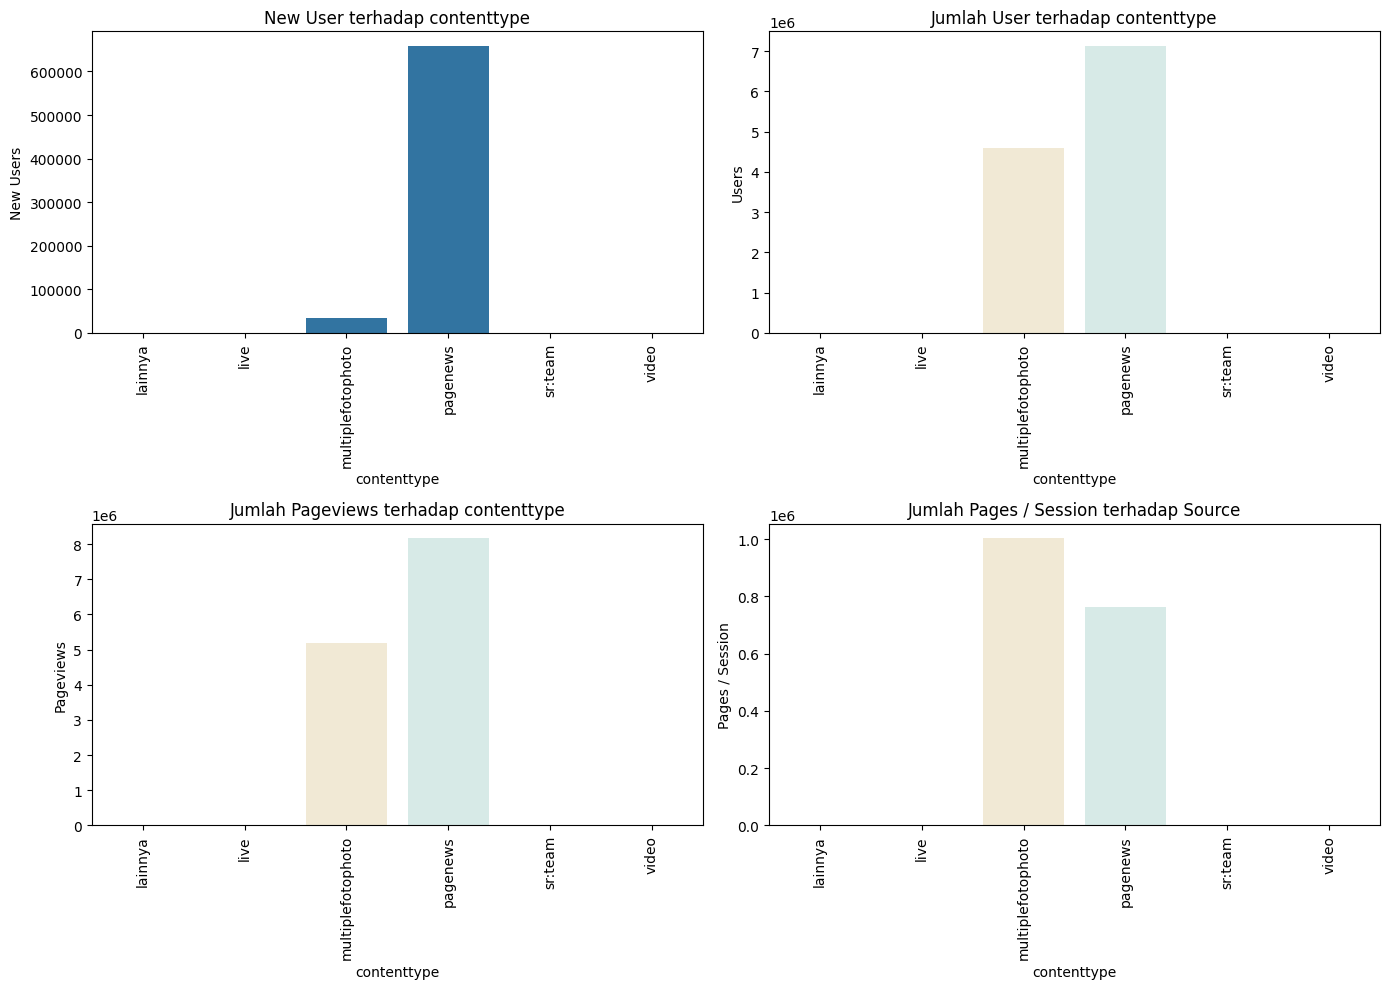

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))

# New User terhadap tipe content
axes[0,0].set_title("New User terhadap contenttype")
sns.barplot(y=data.groupby("contenttype")["New Users"].sum().reset_index()["New Users"], x=data.groupby("contenttype")["New Users"].sum().reset_index()["contenttype"], ax=axes[0,0])
axes[0,0].set_xticklabels(data.groupby("contenttype")["New Users"].sum().reset_index()["contenttype"], rotation=90)
# Jumlah User terhadap tipe content
axes[0,1].set_title("Jumlah User terhadap contenttype")
sns.barplot(y=data.groupby("contenttype")["Users"].sum().reset_index()["Users"], x=data.groupby("contenttype")["Users"].sum().reset_index()["contenttype"], ax=axes[0,1],palette ="BrBG",color="yellow")
axes[0,1].set_xticklabels(data.groupby("contenttype")["Users"].sum().reset_index()["contenttype"], rotation=90)

# Jumlah Pageviews terhadap tipe content
axes[1,0].set_title("Jumlah Pageviews terhadap contenttype")
sns.barplot(y=data.groupby("contenttype")["Pageviews"].sum().reset_index()["Pageviews"], x=data.groupby("contenttype")["Pageviews"].sum().reset_index()["contenttype"], ax=axes[1,0],palette ="BrBG",color="yellow")
axes[1,0].set_xticklabels(data.groupby("contenttype")["Pageviews"].sum().reset_index()["contenttype"], rotation=90)

# Jumlah Pages / Session terhadap tipe content
axes[1,1].set_title("Jumlah Pages / Session terhadap Source")
sns.barplot(y=data.groupby("contenttype")["Pages / Session"].sum().reset_index()["Pages / Session"], x=data.groupby("contenttype")["Pages / Session"].sum().reset_index()["contenttype"], ax=axes[1,1],palette ="BrBG",color="yellow")
axes[1,1].set_xticklabels(data.groupby("contenttype")["Pages / Session"].sum().reset_index()["contenttype"], rotation=90)
# Menampilkan plot
plt.tight_layout()
plt.show()

<ipython-input-31-d37fdf10b2ee>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(data.groupby("contenttype")["Avg. Session Duration"].sum().reset_index()["contenttype"], rotation=90)
<ipython-input-31-d37fdf10b2ee>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data.groupby("contenttype")["Avg. Time on Page"].sum().reset_index()["Avg. Time on Page"], x=data.groupby("contenttype")["Avg. Time on Page"].sum().reset_index()["contenttype"], ax=axes[1],palette ="BrBG",color="yellow")
<ipython-input-31-d37fdf10b2ee>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(data.groupby("contenttype")["Avg. Time on Page"].sum().reset_index()["contenttype"], rotation=90)


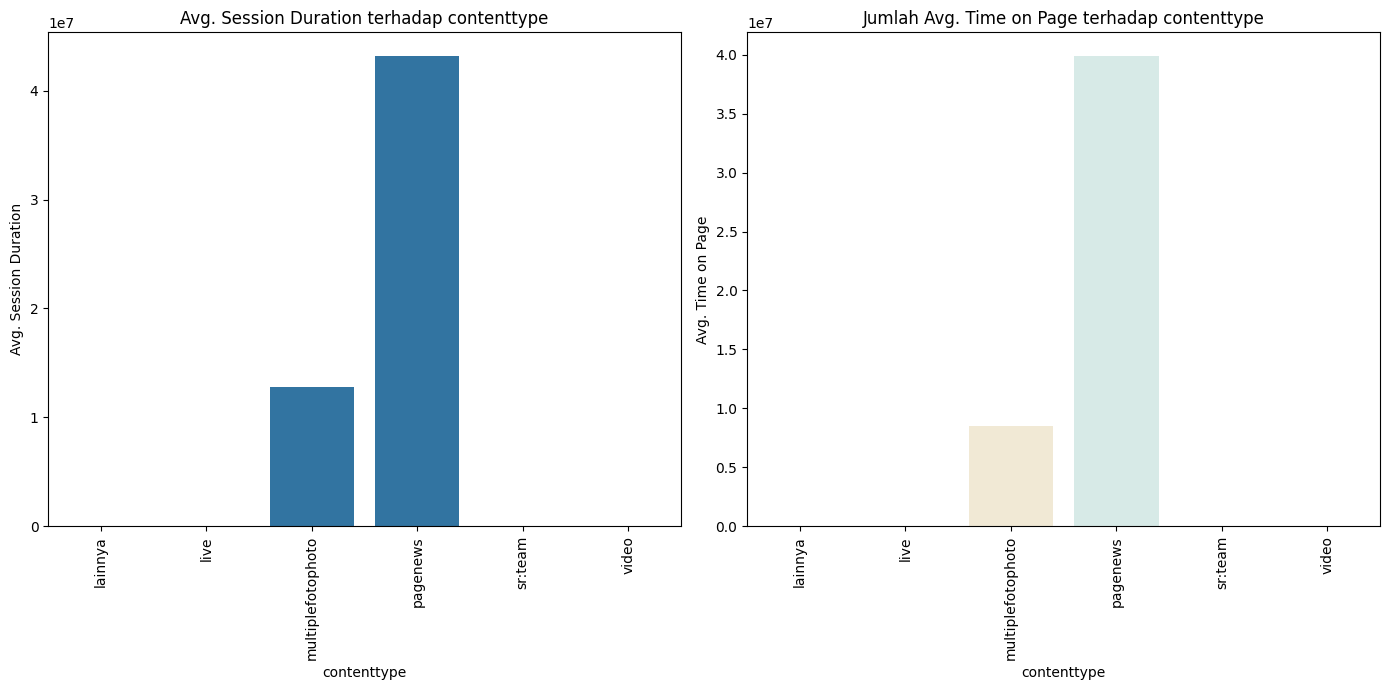

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

# New User terhadap tipe content
axes[0].set_title("Avg. Session Duration terhadap contenttype")
sns.barplot(y=data.groupby("contenttype")["Avg. Session Duration"].sum().reset_index()["Avg. Session Duration"], x=data.groupby("contenttype")["Avg. Session Duration"].sum().reset_index()["contenttype"], ax=axes[0])
axes[0].set_xticklabels(data.groupby("contenttype")["Avg. Session Duration"].sum().reset_index()["contenttype"], rotation=90)
# Jumlah User terhadap tipe content
axes[1].set_title("Jumlah Avg. Time on Page terhadap contenttype")
sns.barplot(y=data.groupby("contenttype")["Avg. Time on Page"].sum().reset_index()["Avg. Time on Page"], x=data.groupby("contenttype")["Avg. Time on Page"].sum().reset_index()["contenttype"], ax=axes[1],palette ="BrBG",color="yellow")
axes[1].set_xticklabels(data.groupby("contenttype")["Avg. Time on Page"].sum().reset_index()["contenttype"], rotation=90)
plt.tight_layout()
plt.show()

In [32]:
numerical_features = data.describe().columns

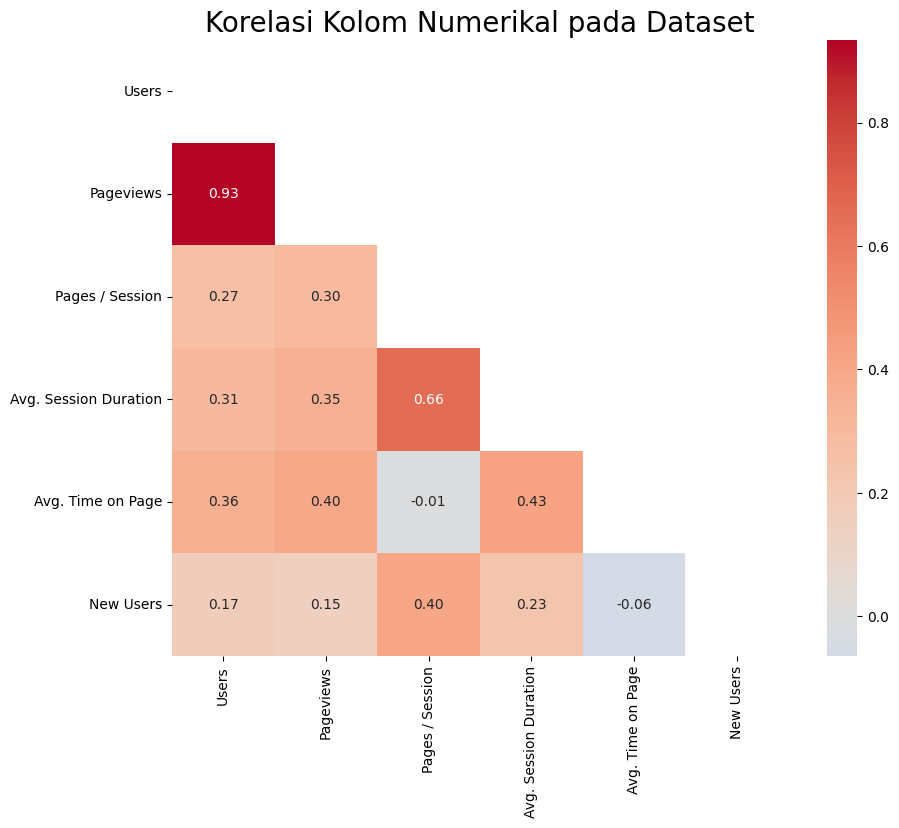

In [33]:
plt.figure(figsize=(10,8))

matrix = np.triu(data[numerical_features].corr(method='spearman'))

sns.heatmap(data=data[numerical_features].corr(method='spearman'), annot=True, fmt='.2f', cmap='coolwarm', center=0, mask = matrix, square='True')
plt.title('Korelasi Kolom Numerikal pada Dataset',size=20)
plt.show()

## Processing Data

In [34]:
data.drop(columns = ["Page Title","articleid"],inplace =True)

In [35]:
data.describe(include ="object").columns

Index(['contenttype', 'Source', 'Medium', 'source Page', 'Type info'], dtype='object')

In [36]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

data_feature_object =data.describe(include ='object').columns
for i in data_feature_object:
  data[i]= encoder.fit_transform(data[[i]])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [37]:
data.head()

,contenttype,Users,Pageviews,Pages / Session,Avg. Session Duration,Avg. Time on Page,New Users,Source,Medium,source Page,Type info
0,0.0,99099,127793,1.546663,113.012962,93.089694,18666,0.0,0.0,0.0,1.0
1,0.0,66409,110322,1.651700,14.790801,2.804197,59502,0.0,1.0,0.0,0.0
2,0.0,64686,79376,1.394323,90.728763,43.394609,25789,0.0,0.0,0.0,1.0
3,0.0,49821,65072,1.386458,137.591554,23.242243,12374,0.0,0.0,0.0,1.0
4,0.0,39147,46828,1.370963,145.927336,205.678242,9375,0.0,0.0,0.0,1.0


<Figure size 2000x1500 with 0 Axes>

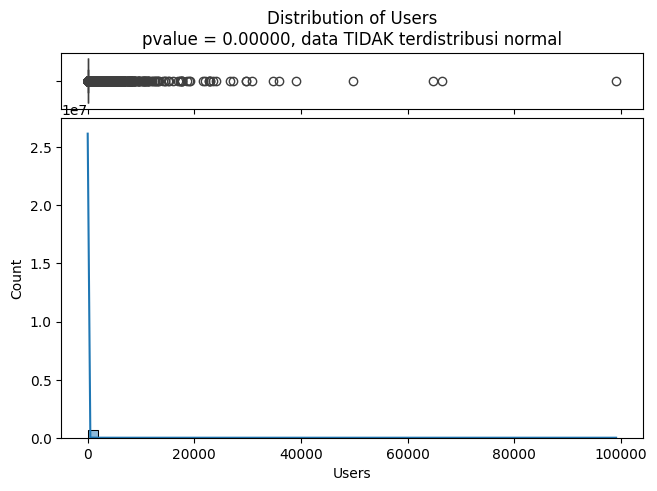

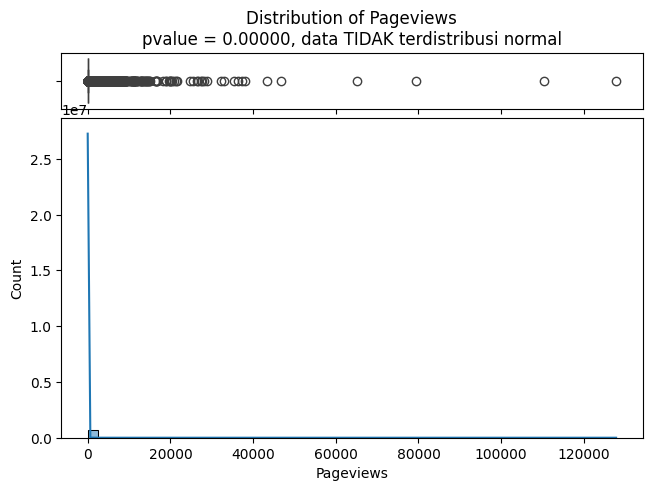

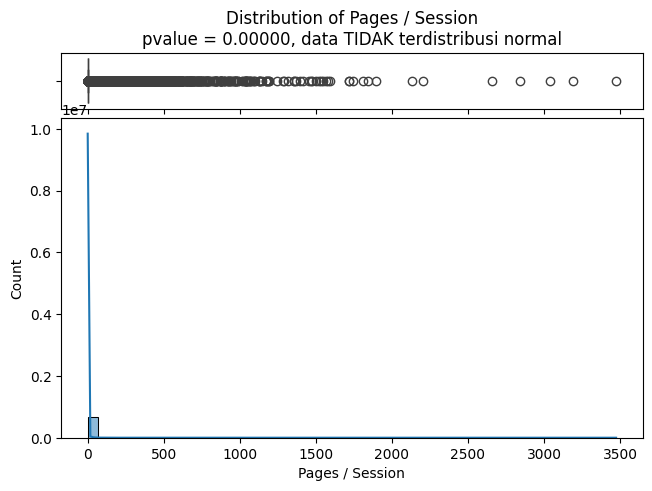

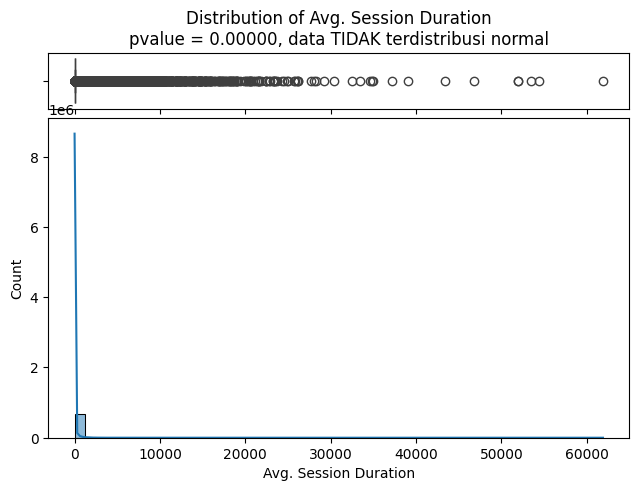

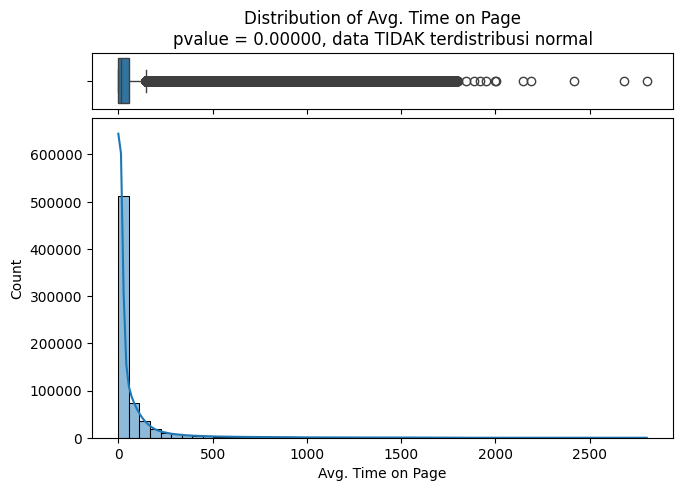

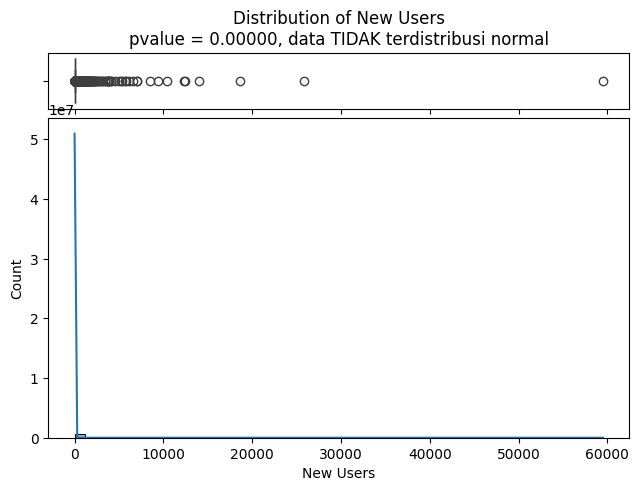

In [38]:
# Plot distribusi data numerikal pada dataset, beserta uji hipotesa dengan menggunakan normaltest
from scipy.stats import normaltest, mannwhitneyu, chi2_contingency
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
for kolom in numerical_features:

    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5),
                                    gridspec_kw={"height_ratios": (.15, .85),
                                                "hspace": 0.05})

    stat, pvalue = normaltest(data[kolom].dropna())

    if pvalue > 0.05 :
        distribusi = f'pvalue = {pvalue:.5f}, data terdistribusi normal'
    else :
        distribusi = f'pvalue = {pvalue:.5f}, data TIDAK terdistribusi normal'

    ax1.set_title(f"Distribution of {kolom}\n{distribusi}", color = "black")
    sns.boxplot(x = data[kolom], ax = ax1)
    ax1.set(xlabel = "")

    sns.histplot(data = data[kolom], ax = ax2, stat = "count", kde=True, bins=50)

    plt.show()

In [39]:
list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in numerical_features:
    IQR = data[feature].quantile(0.75) - data[feature].quantile(0.25)
    lower_fence = data[feature].quantile(0.25) - 1.5*IQR
    upper_fence = data[feature].quantile(0.75) + 1.5*IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(data[data[feature]<lower_fence]))
    number_inside.append(len(data[(data[feature]>=lower_fence) & (data[feature]<=upper_fence)]))
    number_upper.append(len(data[data[feature]>upper_fence]))
    percentage_outlier.append(round((len(data[data[feature]<lower_fence]) + len(data[data[feature]>upper_fence])) / len(data)  *100, 2))

outliers = pd.DataFrame({
    'Kolom' : numerical_features,
    'Lower' : list_lower,
    'Upper' : list_upper,
    '# Lower' : number_lower,
    '# Inside' : number_inside,
    '# Upper' : number_upper,
    '% Outlier' : percentage_outlier
})

outliers

,Kolom,Lower,Upper,# Lower,# Inside,# Upper,% Outlier
0,Users,-2.0,6.0,0,591589,98116,14.23
1,Pageviews,-3.5,8.5,0,600077,89628,13.00
2,Pages / Session,-1.5,2.5,0,636791,52914,7.67
3,Avg. Session Duration,0.0,0.0,0,544346,145359,21.08
4,Avg. Time on Page,-88.5,147.5,0,611131,78574,11.39
5,New Users,0.0,0.0,0,595340,94365,13.68


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [50]:
data.head()

,contenttype,Users,Pageviews,Pages / Session,Avg. Session Duration,Avg. Time on Page,New Users,Source,Medium,source Page,Type info
0,0.0,99099,127793,1.546663,113.012962,93.089694,18666,0.0,0.0,0.0,1.0
1,0.0,66409,110322,1.651700,14.790801,2.804197,59502,0.0,1.0,0.0,0.0
2,0.0,64686,79376,1.394323,90.728763,43.394609,25789,0.0,0.0,0.0,1.0
3,0.0,49821,65072,1.386458,137.591554,23.242243,12374,0.0,0.0,0.0,1.0
4,0.0,39147,46828,1.370963,145.927336,205.678242,9375,0.0,0.0,0.0,1.0


In [37]:
import pandas as pd

def replace_outliers(df):
    # Fungsi untuk mengganti outlier dengan nilai terdekat
    def cap_outliers(series):
        # Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3)
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        # Menghitung IQR (Interquartile Range)
        IQR = Q3 - Q1
        # Menentukan batas bawah dan batas atas
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Mengganti nilai outlier
        series = series.apply(lambda x: lower_bound if x < lower_bound else x)
        series = series.apply(lambda x: upper_bound if x > upper_bound else x)
        return series

    # Terapkan fungsi untuk setiap kolom numerik di DataFrame
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        df[col] = cap_outliers(df[col])

    return df
df_cleaned = replace_outliers(data)

In [39]:
list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in numerical_features:
    IQR = df_cleaned[feature].quantile(0.75) - df_cleaned[feature].quantile(0.25)
    lower_fence = df_cleaned[feature].quantile(0.25) - 1.5*IQR
    upper_fence = df_cleaned[feature].quantile(0.75) + 1.5*IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(df_cleaned[df_cleaned[feature]<lower_fence]))
    number_inside.append(len(df_cleaned[(df_cleaned[feature]>=lower_fence) & (df_cleaned[feature]<=upper_fence)]))
    number_upper.append(len(df_cleaned[df_cleaned[feature]>upper_fence]))
    percentage_outlier.append(round((len(df_cleaned[df_cleaned[feature]<lower_fence]) + len(df_cleaned[df_cleaned[feature]>upper_fence])) / len(df_cleaned)  *100, 2))

outliers = pd.DataFrame({
    'Kolom' : numerical_features,

    'Lower' : list_lower,
    'Upper' : list_upper,
    '# Lower' : number_lower,
    '# Inside' : number_inside,
    '# Upper' : number_upper,
    '% Outlier' : percentage_outlier
})

outliers

,Kolom,Lower,Upper,# Lower,# Inside,# Upper,% Outlier
0,Users,-2.0,6.0,0,689705,0,0.0
1,Pageviews,-3.5,8.5,0,689705,0,0.0
2,Pages / Session,-1.5,2.5,0,689705,0,0.0
3,Avg. Session Duration,0.0,0.0,0,689705,0,0.0
4,Avg. Time on Page,-88.5,147.5,0,689705,0,0.0
5,New Users,0.0,0.0,0,689705,0,0.0


In [53]:
X =data.drop(columns ="New Users")
y =data["New Users"]

X_train,X_test,y_train,y_test  =train_test_split(X,y,test_size =0.2,random_state =42)

In [45]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [46]:
y_pred =model.predict(X_test)
y_pred

array([0.28169691, 0.        , 0.        , ..., 0.        , 0.08      ,
       0.27481245])

In [47]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.7549348677222589


In [56]:
data_perbandingan =pd.DataFrame({"y_test":y_test,"y_pred":y_pred,"accuracy_score":r2})
data_perbandingan

,y_test,y_pred,accuracy_score
426400,1,0.281697,0.754935
167783,0,0.000000,0.754935
208627,0,0.000000,0.754935
374803,0,0.274812,0.754935
553415,0,0.281697,0.754935
...,...,...,...
94657,0,0.280000,0.754935
5954,0,0.000000,0.754935
410070,0,0.000000,0.754935
254878,0,0.080000,0.754935


insight
- pada  data diatas kita dapa melihat beberapa keterangan column
 - Page title menerangkan mengenai judul dari halaman yang ada di Page
 - Page adalah URL atau tautan ke halaman web yang terkait dengan artikel
 - articleid adalah semacam key value untuk tiap tiap artikel atau Identifikasi unik untuk artikel
 - contenttype adalah Jenis konten dari halaman web
 - Sumber lalu lintas atau cara pengguna sampai ke halaman web
 - Users adalah Jumlah pengguna yang mengakses halaman web
 - Pages / Session: Rata-rata halaman yang dilihat oleh pengguna dalam satu sesi
 - Avg. Session Duration: Rata-rata durasi sesi pengguna
 - Avg. Time on Page: Rata-rata waktu yang dihabiskan pengguna pada halaman tertentu
 - New Users: Jumlah pengguna baru yang mengakses halaman web
- dari column Page title sampai source/ medium adalah parameter (kecuali articleid) yang akan mempengaruhi dari besar kecilnya column dari users hingga column new users

**Insight**

1. Page title yang paling banyak di baca adalah Kerennya Foto Editan Para Master Photoshop
2. Alamat yang paling banyak dikunjungi adalah yang memuat masalah gempa keras yang mengguncang jakarta
3. Jenis contenttype yang paling tinggi adalah siglepagenews
4. source/medium yang paling banyak dipakai dalam mengakses pencarian adalah google/organic, organic disini kita melakukan pencarian pada google pada umumnya
5. sumber Page title yang paling banyak dikunjungi adalah 99099 pengunjung
6. total jumlah halaman yang dilihat oleh semua pengguna selama suatu periode waktu tertentu adalah 127793
7. jumlah pages yang dikunjungi dalam 1 sesion secara bersama sama memiliki maksimal yaitu 3474
8. rata-rata waktu tertinggi yang dihabiskan oleh semua pengguna selama sesi di situs web. Sesi dihitung mulai dari saat pengguna membuka situs web hingga meninggalkannya adalah 61888 ini juga kita bisa identifikasi sebagai nilai yang dapat kita gunakan dalam menghitung jumlah pengunjung karna ini mencakup semua orang
9. rata-rata waktu yang dihabiskan oleh semua pengguna pada halaman tertentu selama kunjungan mereka tertinggi adalah 2803
10. angka user baru tertinggi adalah 59502 ini bisa kita lihat untuk mengidentifikasi parameter yang meningkatkan user baru apakah karna jenis pemberitaanya atau karna parameter lainnya

**Insight**
- Page Title title cukup banyak untuk dilakukan analisa jenis berita apa yang menghasilkan parameter yang besar nilainya mencapai 152219
- Page nya juga cukup banyak mencapai 284596 padahal saya berpikir bagaimana kita mengetahui web yang mana yang paling banyak di kunjungi


**Insight**
- Karna domain Url Page yang begitu banyak saya hanya mengambil domain utama utama saja seperti **m.detik.com**
- Begitu juga dengan Page title yang beragam saya sangat kesulitan dalam mengklasifikasikan jenis beritanya maka dari itu dari column saya mengambil klasifikasi teksnya contohnya **news**

**Insight**
- Tidak ada missing value pada data diatas
- Tetapi jika kita mengamati ada data yang berisi direct/none pada column source/Medium

**Insight**
- kita bisa melihat bahwa korelasi paling besar tercipta antara user dan pagevies kita memang betul semakin banyaak user yang mengunjungi sebuah web maka pagevies semakin besar
- ada beberapa **korelasi** yang bernilai negati berarti contohnya AVg.session Duration terhadap New user berarti untuk meningkatkan new user kita dapat mengurangi Avg.time On page artinya bisa dengan mengurangi page dengan meningkatkan inti inti berita saja pada web
- pada users dan pageviews memiliki korelasi yang positif terhadap New Users tetapi nilainya cukup kecil diantara **0.15-0.20** yang artinya kunjungan user lama dan banyaknya page itu di baca tidak terlalu mempengaruhi kepada penambahan user baru memang betul untuk meningkatkan new user harus memuat berita yang menarik agar user yang lama dapat berbagi kepada user melalui sharing media
- pada Avg. session Duration dan Pages/session juga memiliki korelasi positif dengan new user tetapi juga tidak terlalu kuat walaupun lebih kuat dari pada User dan pageviews Terhadap New Users, artinya untuk meningkatkan New Users kita dapat meningkatkan AVg.session Duration dengan cara mungkin menyederhanakan page sehingga pembaca lebih mudah dalam memahami isi dari page tersebut ,kemudahan ini mungkin yang akan akan membuat user lama mensharing page tersebut ke orang lain




**Insight**
- web yang paling banyak dikunjungi oleh user adalah **sepakbola.detik.com** dengan rata rata kunjungan persesion adalah **30-40** Kunjungan ,mungkin ini karna pada saat data ini dibuat pemberitaan mengenai bola sedang naik naiknya,selain itu kita mengetahui bahwa olahraga sepakbola adalah olahraga yang paling banyak di gemari masyarakat indonesia
- pada pageviews juga pemberitaan mengenai sepakbola juga mendominasi hal ini karna kunjugan yang banyak
- pada **Page/session** pemberitaan yang bersumber dari **sport.detik.com** memiliki nilai yang tertinggi yang artinya web ini dibaca paling banyak tiap session nya artinya ada beberapa hal yang bisa kita pertimbangkan kenapa ini terjadi jika melihat dari data **Avg. Time on Page** ternyata **sport.detik.com** itu tidak terlalu tinggi artinya **user** yang mengunjungi web tersebut hanya melihat sekilas saja page tersebut , untuk itu saya beranggapan hal yang dapat kita lakukan untuk meningkatkan lama waktu pembukaan web adalah
  - Buatlah halaman web Anda dengan struktur yang jelas dan navigasi yang mudah
  - Integrasi elemen multimedia seperti gambar, video, atau grafik dapat membuat halaman lebih menarik dan meningkatkan retensi pengunjung
  - menggunakan CTA yang menarik untuk mendorong pengunjung untuk melakukan tindakan selanjutnya, seperti membaca artikel terkait, berlangganan, atau berbagi konten.
  - Pastikan bahwa halaman web Anda memuat dengan cepat. Pengunjung cenderung meninggalkan halaman jika memuat terlalu lama
  - kita bisa menggunakan **garuda.detik.com** sebagai web rujukan untuk membandingkan karna web ini memiliki **Avg. Time on Page** tertinggi tetapi sekali lagi parameter yang lain hary dipertimbangkan mungkin karna jaringan sehingga pindah ke page berikutnya sulit
- pada **new user** ternyata web **cs.swiftscore.com** adalah yang tertinggi sebuah web yang menyediakan Skor Langsung, Klasemen, Jadwal Pertandingan, Tabel, Gol, Berita Sepak Bola, dan semua jenis olahraga yang berfokus terutama pada sepak bola. Dari sini kita dapat melihat pengunjung baru akan terus bertambah jika dia berhubungan dengan olahraga , tetapi melihat dari **Avg. Time on Page** dan **Avg. Time on Page** tidak terlalu tinggi pada web ini artinya saya menyarankan untuk detik.com membuat situs yang yang sama dengan **cs.swiftscore.com**  tetapi dengan **Page** yang lebih menarik agar waktu pengunjung ke web tersebut lebih tinggi

**insight**
- data diatas menunjukkan jenis contenttype terhadap rata-rata parameter lain, contohnya contenttype yang mana yang rata-rata user kunjungi terbanyak dan lainnya
- pada kunjungan **users**,Pagevies, dan New Users kita dapat melihat bahwa **contenttype** sr:team:2833 menjadi contenttype yang paling banyak dikunjungi ada beberapa hal yang dapat kita  beri narasi awal karna kurangnya pengetahuan saya mengenai jenis contettype ini, mengetahui bagaimana sr:team:26833 bekerja mungkin bisa dijadikan acuan untuk contenttype lain
- sedangkan Page/session dan Avg.Time on Page , contenttype sr:team:74 menjadi yang tertinggi ,ada beberapa asumsi positif yang bisa kita katakan dari sini diantaranya kontentnya mungkin cukup menarik atau relevan,dengan kualitas yang tinggi atau mungkin cara pembawaan contenttype nya menarik hal ini bisa dijadikan acuan bagi contenttype lain , terutama contenttype sr:team:2833 yang memiliki users terbanyak ini akan mengoptimalkan nilai dari web tersebut

**Insight**
-

**Insight**

-  data diatas menunjukkan bagaimana 20 data klasifikasi yang paling  banyak penggunaannya berdasarkan **klasifikasi_berita**
- pada **User** terhadap **klasifikasi_berita** kita dapat melihat bahwa ternyata pemberitaan mengenai kesehatan adalah pemberitaan paling banyak yang dikunjungi users hal ini mungkin karna pentingnya kesehatan menjadi penunjung masyarakat mengunjungi berita yang berhubungan dengan kesehatan
- pada pemberitaan mengenai **teknologi(inet)** ternyata memiliki nilai yang kurang memuaskan padahal pemberitaan ini bisa menjadi andalan dimana era teknologi sekarang ,pada plotting **Page/session** ternyata nilai **inet** ini cukup tinggi artinya user banyak membaca page nya per session dan waktu **Avg.Time on Page** cukup besar juga , hal ini cukup berlawanan dengan rentahnya user pada **inet** saya menduga hal ini karena pemberitaan teknologi hanya dinikmati oleh orang orang yang mencintai teknologi sedangkan yang tidak menyukai mungkin tidak tertarik mengenai page ini, tetapi melihat tren positifnya pada bagian **Page/session** dan **Avg.Time on Page** berarti web ini cukup menarik tinggal mengikuti perubahan zaman saja hingga perkembangan teknologi menjadi penting
- Penambahan **New_user** pada 20 data teratas didominasi oleh pengaruh pemberitaan topik mengenai **Kesehatan** dan **berita** berarti ini adalah peluang besar dimana ternyata penaikan **new_user** bisa kita optimalkan dengan pemberitaan lain bukan dari kedua topik pemberitaan tersebut